# Intermediate Dataframe

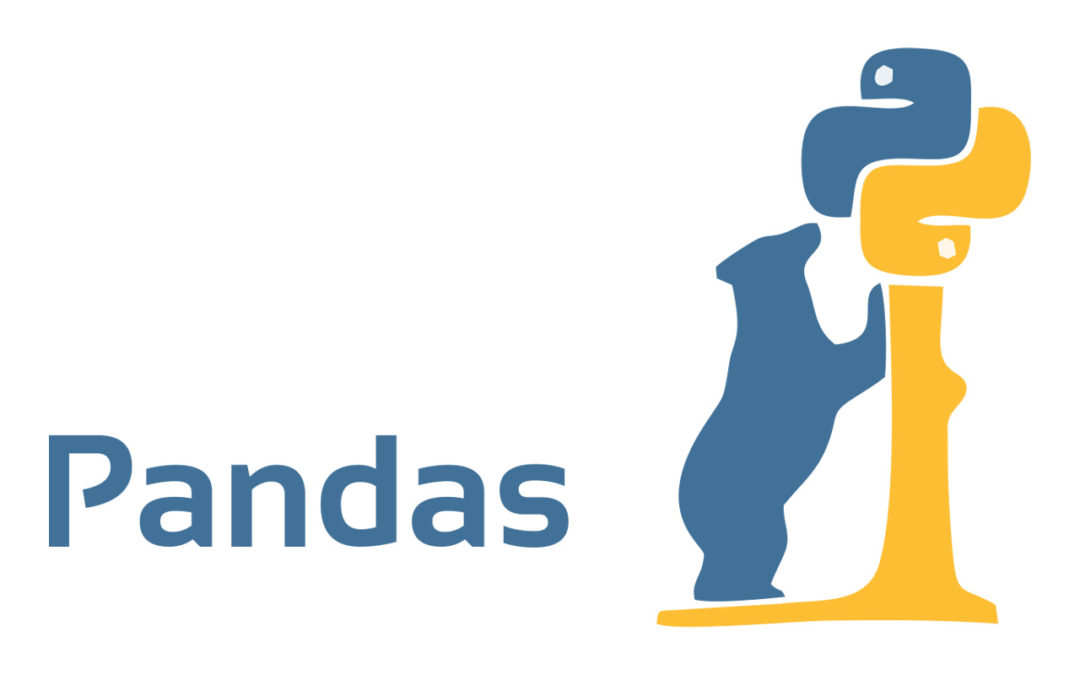

## Outline
 - sorting dataframe
 - filtering dataframe
 - create additional column
 - grouping dataframe
 - aggregate dataframe
 - merging dataframe

## Dataset

Dataset yang akan digunakan dalam sesi ini adalah data titanic yang dapat diakses melalui link berikut: https://www.kaggle.com/c/titanic/data?select=train.csv (or visit this link to download dataset directly from kaggle: https://www.kaggle.com/general/74235)

In [ ]:
import pandas as pd
df_titanic=pd.read_csv('/content/train.csv')
df_titanic

## Sorting Dataframe

sorting merupakan proses untuk mengurutkan dataframe sesuai dengan kriteria tertentu yang disertakan dalam parameter. fungsi ini mirip dengan perintah sql **order by**, dimana pengguna bisa memilih metode sorting yang digunakan dan kolom-kolom yang dijadikan acuan untuk pengurutan.

Fungsi dalam library yang mendukung proses sorting adalah **sort_values** yang mengambil beberapa parameter, seperti nama kolom basis pengurutan, metode pengurutan, dst. Gambar berikut menjelaskan fungsi sort_values dan beberapa parameter yang sering digunakan (courtesy from https://www.sharpsightlabs.com/)

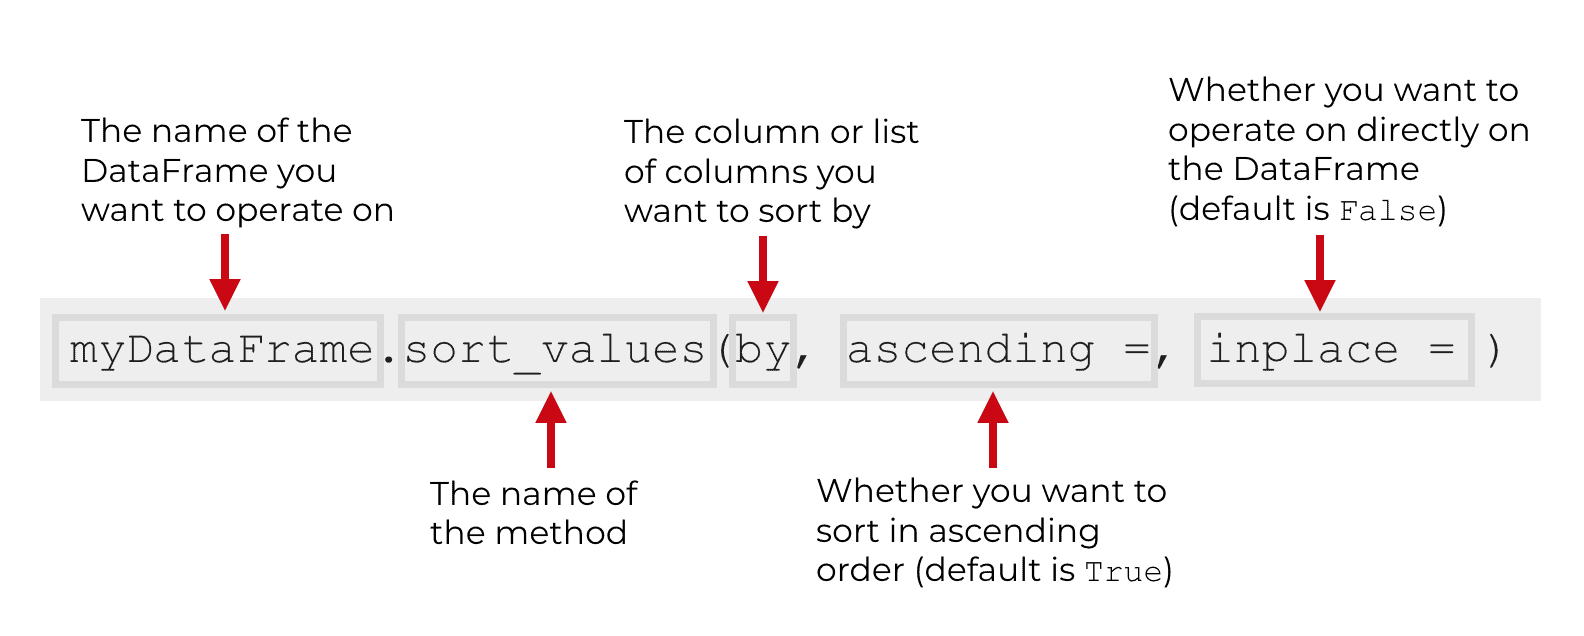

Beberapa parameter yang sering digunakan dalam pemanggilan fungsi sort_value antara lain:

#### by

By merupakan argument yang akan membaca nama kolom yang akan dijadikan basis pengurutan. Parameter ini akan membaca baik variabel bertipe string atau list of string yang berisikan nama kolom pengurutan

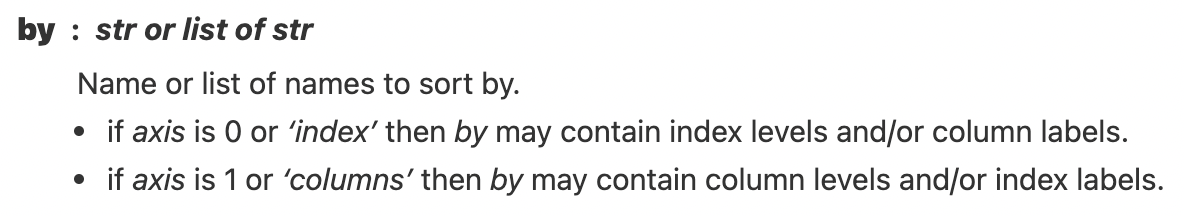

#### ascending

Argument ini akan membaca bagaimana pola pengurutan yang akan dilakukan, apakah ascending (dari kecil ke besar) atau sebaliknya (descending). Secara default, ordering akan dilakukan dari nilai terkecil hingga nilai terbesar.

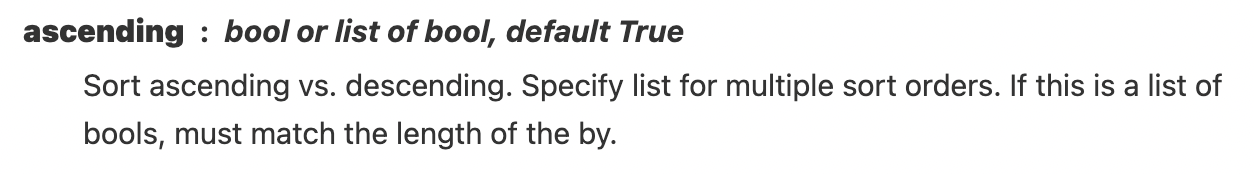

In [ ]:
## contoh pengurutan dataframe
df_titanic.sort_values(by='Name', ascending=True)

### Boolean indexing

Boolean indexing merupakan proses pemilihan data menggunakan nilai boolean, dimana nilai boolean ini akan bertindak sebagai index untuk pemanggilan.

## Filtering Dataframe

Filtering merupakan proses dimana suatu conditional expression digunakan untuk menyaring baris data yang akan ditampilkan. Fungsi ini akan melakukan proses filter, seperti yang dilakukan oleh statement **where** dalam syntax SQL. Pandas akan melakukan pengecekan terhadap semua baris dalam dataframe dan akan mengevaluasi nilai Boolean dari masing-masing row.

In [ ]:
### contoh output conditional results
df_titanic['Sex']=='male'

Setelah conditional result didapatkan, pandas akan menggunakan data tersebut sebagai index untuk menampilkan baris yang bernilai **True**. Pandas akan menggunakan boolean indexing untuk menentukan pakah suatu baris perlu ditampilkan sebagai hasil akhir

In [ ]:
### contoh filtering dataframe
df_titanic[df_titanic['Sex']=='male']

### filtering multiple conditions

Pandas juga menyediakan skema filtrasi dengan beberapa conditions dalam satu proses sekaligus. Untuk menggabungkan dua kondisi, kita bisa menggunakan logical operators dengan meletakkan masing-masing kondisi dalam tanda kurung **()**

In [ ]:
### contoh filtering multiple conditions
df_titanic[(df_titanic['Sex']=='male') & (df_titanic['Survived']==1)]

## Create additional column

Dataframe merupakan tipe data yang dapat-dapat diubah bentuknya, sehingga memberikan kemudahan bagi kita untuk menambahkan satu kolom turunan dari kolom-kolom yang sudah ada. Untuk membuat kolom baru dari dataframe yang sudah ada, kita bisa menambahkan suatu list/dictionary dan menyimpan data tersebut sebagai kolom baru pada dataframe yang sudah ada sebelumnya

In [ ]:
### contoh pembuatan kolom nilai statis
df_titanic['still_alive']=0
df_titanic

### create additional column by using values from other columns

Salah satu kelebihan utama dari dataframe adalah user dapat memanipulasi dataframe dengan mudah. Manipulasi yang sering digunakan dan bermanfaat oleh seorang data scientist adalah pembuatan kolom baru dimana nilainya didapatkan dari kolom lain. Proses ini biasa disebut sebagai **feature engineering**, dimana data scientist mencoba mencari hidden pattern dari data untuk dijadikan insights untuk berbagai keperluan, mulai dari pembuatan model machine learning, visualisasi, dst

untuk membuat turunan variabel, user hanya perlu menuliskan operasi yang akan dilakukan terhadap kolom tersebut dan assign kolom baru yang akan menyimpan hasil pengolahan kolom tersebut

In [ ]:
### contoh pembuatan column dari data lain
df_titanic['age_per_now']=df_titanic['Age']+103.0
df_titanic

## Grouping Dataframe

grouping merupakan proses untuk mengelompokkan dataframe sesuai dengan nilai pada kolom yang dijadikan acuan. fungsi ini merupakan ekuivalen sql command **group by** yang sama-sama menggabungkan data sesuai dengan kolom acuan yang diinputkan oleh user.

fungsi dalam library pandas yang disediakan untuk melakukan proses ini adalah **group by**, dengan cara pemanggilan dan parameter-parameter seperti di bawah ini

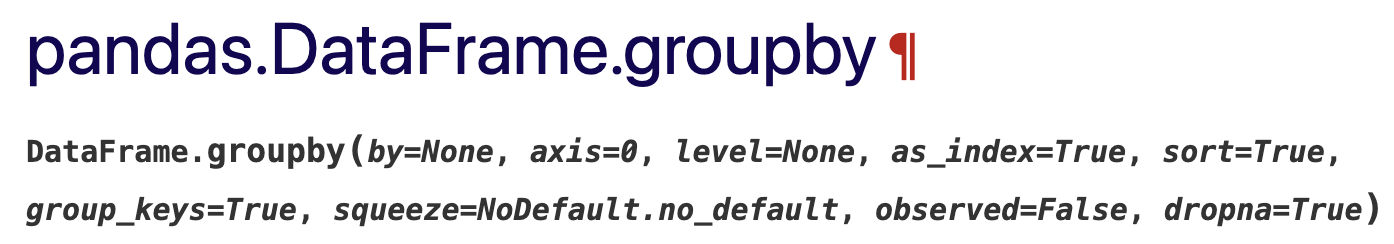

beberapa parameter yang sering digunakan dalam pemanggilan fungsi ini adalah:

#### by

by merupakan parameter yang akan membaca nama kolom manakah dari dataframe yang akan dijadikan acuan dalam pengelompokkan dataframe. Walaupun fungsi ini mampu menerima berbagai tipe input data sebagai parameter, most of the time by akan diisi oleh **string yang menandakan nama kolom**

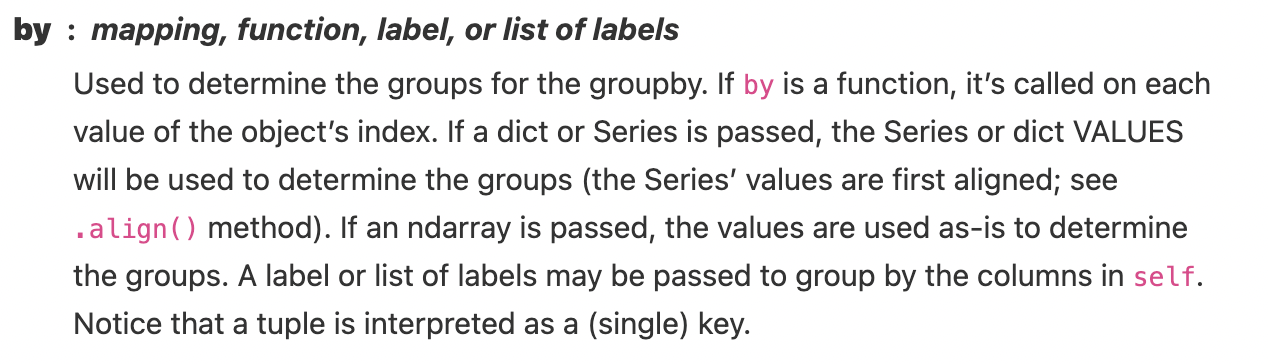

In [ ]:
### contoh groupby dalam pandas
df_titanic.groupby(by='Survived')

## Dataframe aggregate function

Dataframe juga menyediakan fungsi aggregate untuk mengelompokkan nilai-nilai dari beberapa row menjadi satu nilai summary. Fungsi ini biasanya digunakan untuk mengelompokkan nilai-nilai yang bersifat numerik, karena dataframe lebih menyediakan banyak fungsi aggregate untuk variabel angka. (courtesy by https://data-flair.training/)

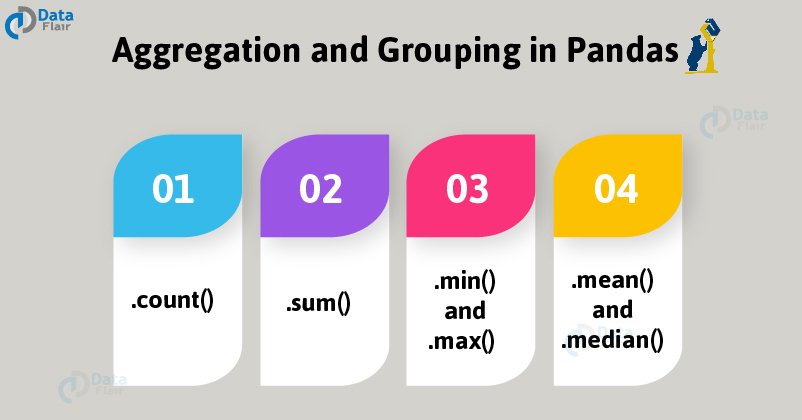

Dalam pengaplikasiannya, pemanggilan fungsi agg biasa dilakukan setelah dataframe di kelompokkan terlebih dahulu menggunakan fungsi groupby. Fungsi aggregate dalam library python adalah **agg** yang detailnya bisa dilihat di gambar berikut.

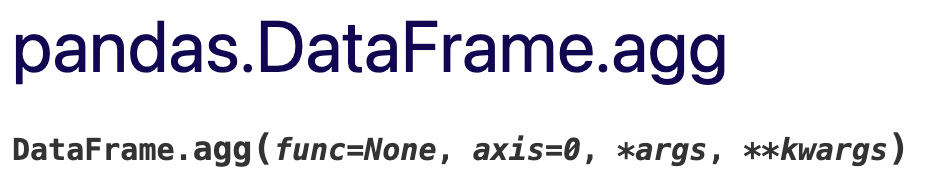

dalam pemanggilan fungsi agg, ada beberapa parameter fungsi yang biasa digunakan, antara lain:

#### func

merupakan parameter yang akan menampung aggregate functions yang akan dilakukan terhadap kolom-kolom pada dataframe tersebut. Daftar aggregate functions yang bisa dilakukan oleh pandas untuk variabel bertipe numerik dapat dilihat pada halaman berikut: https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/

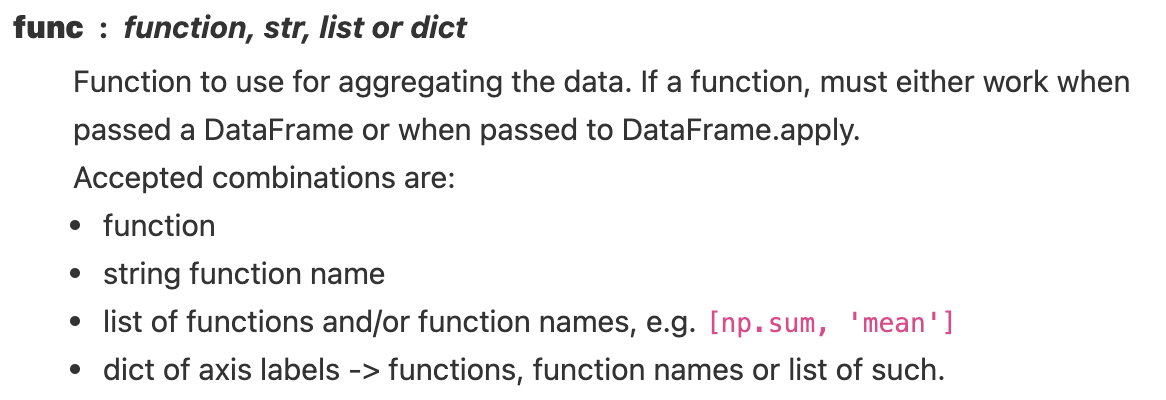

In [ ]:
### contoh aggeregate function numerik
df_titanic.groupby(by='Survived')['Name'].count()

apabila dibutuhkan proses aggregasi untuk variabel bertipe non-numerik, salah satu proses yang bisa dilakukan adalah menampung seluruh nilai ke dalam satu list yang bisa digunakan untuk pengolahan lebih lanjut. Syntax yang digunakan adalah **apply(list)** untuk menggabungkan nilai ke dalam list

In [ ]:
### contoh aggregate list
df_titanic.groupby(by='Survived')['Name'].apply(list)

### Multiple aggregate

Kita bisa memanfaatkan flexibilitas dari parameter function untuk melakukan beberapa aggregasi berbeda terhadap satu kolom. Hal itu dilakukan dengan cara menginputkan **list of aggregate functions**

In [ ]:
### multiple aggregate same columns
df_titanic.groupby(by='Survived')['Age'].agg(['mean', 'max', 'min'])

Selain itu, kita bisa juga mengeluarkan nilai aggregate dari beberapa kolom dalam satu kode sekaligus dengan memodifikasi parameter func yang diberikan. Instead of nama function yang dilakukan, user bisa memasukkan variabel bertipe **dictionary** dengan key nama variabel yang akan diaggregate dan value merepresentasikan fungsi aggregate yang dilakukan spesifically untuk key tersebut 

In [ ]:
### multiple aggregate multiple columns
df_titanic.groupby(by='Survived').agg({'Age':['mean', 'max', 'min'],'Fare':'mean'})

## Merging

merging merupakan proses penggabungan dua dataframe mirip dengan operasi join pada database. Dengan kata lain, merge merupakan operasi yang dilakukan untuk menggabungkan baris yang memiliki nilai keys yang sama. Merge merupakan operasi penggabungan yang paling fleksibel karena pandas menyediakan beberapa opsi tambahan terkait dengan penggunaan fungsi merge. 

penulisan syntax fungsi merge() adalah sebagai berikut:

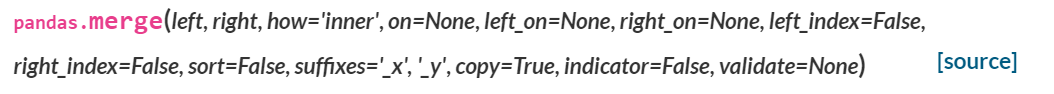

### Basic Parameters

beberapa parameter yang sering digunakan dalam pemanggilan fungsi merge() adalah sebagai berikut:

#### left,right

left, right merupakan parameter yang akan menyimpan dua dataframe yang akan digabungkan

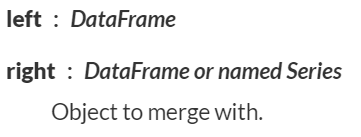

#### how

how merupakan parameter yang akan menentukan skema penggabungan dua dataframe tersebut. skema yang bisa digunakan adalah sebagai berikut

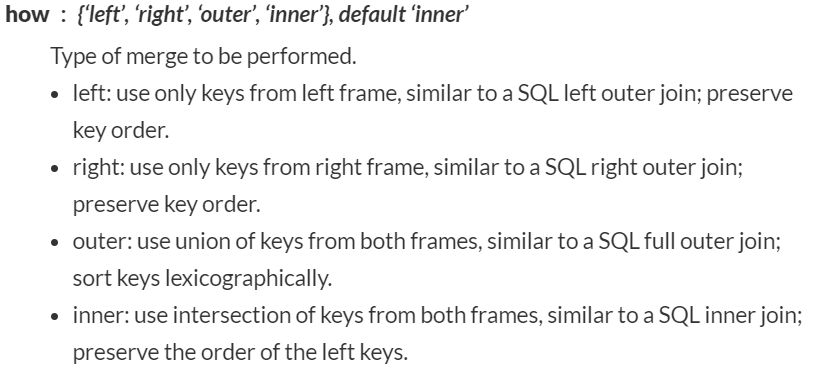

ilustrasi hasil penggabungan menggunakan skema diatas adalah sebagai berikut

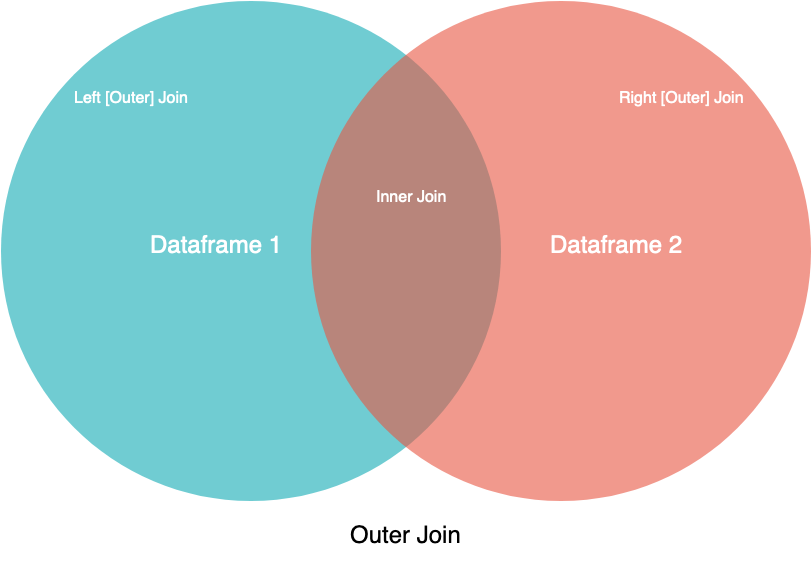

#### on

on merupakan parameter yang mendefinisikan kolom manakah dari dua dataframe tersebut yang akan dicocokkan. apabila jumlah kolom yang akan digabungkan lebih dari situ, kita bisa gunakan list yang berisi nama kolom manakah yang akan digunakan. syntaxnya adalah sebagai berikut:

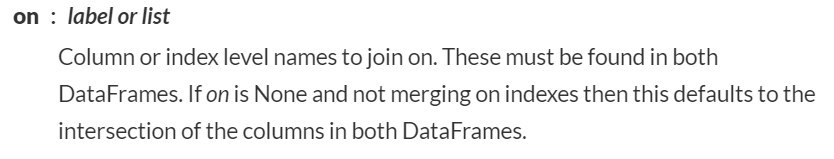

In [ ]:
## membuat dataframe dummy yg akan dimerge dengan df_titanic
df_city_embarkation=pd.DataFrame([['S',' Southampton'],['C','Cherbourg'],['Q','Queenstown']],columns=['Embarked','City Name'])
df_city_embarkation

In [ ]:
# contoh penggabungan dua dataframe menggunakan merge
df_titanic.merge(df_city_embarkation, on='Embarked', how='inner')

### Advanced Parameters

parameter-parameter berikut merupakan parameter yang bisa digunakan untuk case-case tertentu, seperti nama kolom yang berbeda, nama kolom clash, dst

#### right_on/left_on

parameter ini digunakan untuk menggabungkan dua dataframe dengan nama kolom basis yang berbeda. syntax yang digunakan adalah sebagai berikut:

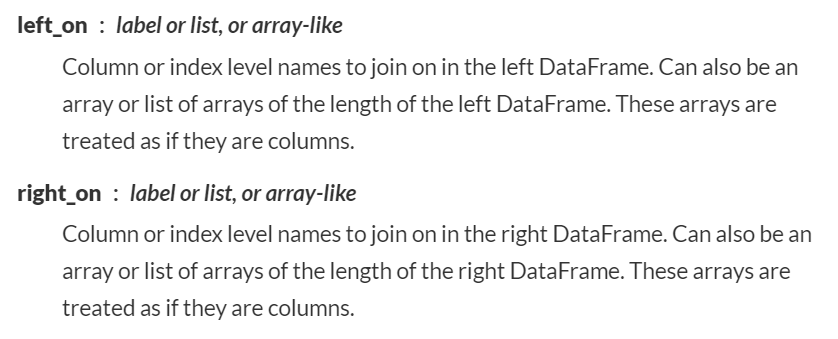

In [ ]:
## membuat dataframe dummy yg akan dimerge dengan df_titanic
df_city_embarkation=pd.DataFrame([['S',' Southampton'],['C','Cherbourg'],['Q','Queenstown']],columns=['City Code','City Name'])
df_city_embarkation

In [ ]:
# contoh penggabungan dua dataframe dengan kolom yang berbeda
df_titanic.merge(df_city_embarkation, left_on='Embarked', right_on='City Code',how='inner')

#### suffixes

suffixes merupakan imbuhan yang akan ditambahkan kepada nama kolom setelah proses join dataframe dilakukan. suffixes dilakukan agar nama kolom lebih representatif terhadap data. penjelasan parameter suffixes adalah sebagai berikut:

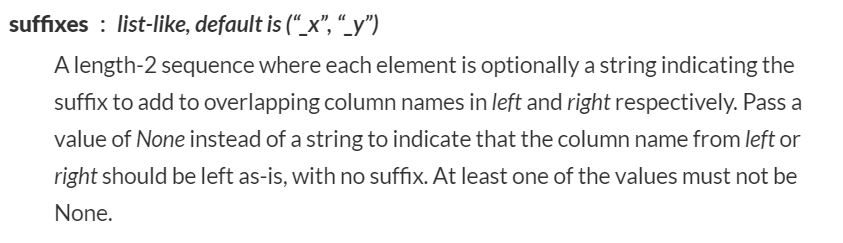

In [ ]:
## membuat dataframe dummy yg akan dimerge dengan df_titanic
df_city_embarkation=pd.DataFrame([['S',' Southampton'],['C','Cherbourg'],['Q','Queenstown']],columns=['City Code','Embarked'])
df_city_embarkation

In [ ]:
# contoh hasil penggabungan tanpa suffix
df_titanic.merge(df_city_embarkation, left_on='Embarked', right_on='City Code',how='inner')

In [ ]:
# contoh hasil penggabungan dengan suffix
df_titanic.merge(df_city_embarkation, left_on='Embarked', right_on='City Code',how='inner',suffixes=('_from_titanic','_from_embarkation'))